# COMP2420/6420 - Introduction to Data Management, Analysis and Security


### Australian National University

### College of Engineering and Computer Science

Assignment 2 
============

  
|**Maximum marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the total marks for the course**
|  **Submission deadline** |  **5pm, Thursday, April 26**
|  **Submission mode**     |  **Electronic, using wattle**
|  **Estimated time**      |  **15 hours**
|  **Penalty**             |  **100% after the deadline**
  


# Submission

You need to submit the notebook `Assignment-2.ipynb` as part of your submission on wattle. You need to add your group and student details below. Remember your filename should be exact as given below. Any changes to file name would mean your file can't be graded by the auto=grader, resulting in zero marks.

**Note**

* For answers requiring free form written text, use designated cells denoted by `YOUR ANSWER HERE`, just double click and start writing inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* After inserting your code **please remove** the following line from each code cell `raise NotImplementedError()`.
* To test your code, you can insert more cells or some print statements, but while submitting the file remember to remove those extra cells and print statements.
* We have marked some questions with a tag **hard** and **slightly hard**, so that you can plan your time accordingly
* We advice students to skip Q1 and use our cleaned dataset if they struggle with it. You can always come back after finishing all other questions.

### Group Name : 193
### Student Id1: u6488845
### Student Id2: u5810991

In [24]:
import json
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
## inline figures
%matplotlib inline

## Q1 [15 marks]

Complete the  function `read_json(directory)` to read all the tweets from the folder `data/yt_tweets` into a single dataframe. There is more than one file inside the folder. Your function must take as an argument the data folder where all the files are kept and should return a single dataframe. Make sure you read only `.json` files in the folder.

Each line in the files corresponds to a tweet, where the structure for a tweet is encoded as a `json` object. The details about a [tweet](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object) object as given by [Twitter](https://twitter.com/?lang=en) can be found on their [developer page](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

You need to write a function that extracts the following details into a dataframe from a tweet:

* creation date (datetime for tweet)
* id_str (unique id of the tweet)
* user_id_str (unique id of the user who tweeted the tweet)
* retweeted_id (if it's a retweet, unique id of the tweet it is retweet of else np.nan)
* user_followers (no.of followers of the user who tweeted)
* user_friends (no.of friends of the user who tweeted)
* number of user mentions in the tweet (no.of user mentions in the tweet)
* number of hashtags in the tweet (no.of hashtags in the tweet)
* language of tweet (language of the tweet) 
* language of user (language of the user) 
* name of place where tweet originated (if exists name of the place where tweet originated from. use field name not full_name)


**Note:**
* The column names for your dataframe should be following:  
**['time_created', 'twid', 'user_id', 'rtwid', '#followers', '#friends', '#mentions', '#hashtags','lang_tweet', 'lang_user', 'place']**
* All invalid/non-existent column values should take numpy value NaN (np.NaN) (Look at exercise 4 of [lab 4](https://cs.anu.edu.au/courses/comp2420/labs/lab-4/))
* The datatypes of your dataframe should be exactly as follows, only excpetion is using int32 if your OS doesnt support int64:

|Column|Data type|
|------|---------|
|time_created|    datetime64[ns]|
|twid        |            object|
|user_id     |            object|
|rtwid       |            object|
|#followers  |             int64|
|#friends    |             int64|
|#mentions   |             int64|
|#hashtags   |             int64|
|lang_tweet  |            object|
|lang_user   |            object|
|place       |            object|


In [25]:

def read_json(directory):
    """Reads a json file and returns a list of tweets in it.
    Each tweet contains it's creation date, id_str, user_id_str, user_followers, retweeted_status
    Field retweeted_status either has id of the tweet which this tweet has retweeted or id same as the tweet id
    indicating the tweet is not a retweet.
    
    Args:
        filename: name of the file to be read
    
    Returns:
        list: a list with all tweets in the file
        
    """
    dfDic = {"time_created" : [], "twid" : [], "user_id" : [], "rtwid" : [], "#followers" : [], "#friends" : [],
            "#mentions" : [], "#hashtags" : [], "lang_tweet" : [], "lang_user" : [], "place" : []}
    for file in os.listdir(directory):
        if file.endswith('.json'):
            with open(directory + file, "r") as reader:
                for line in reader:
                    tweet = json.loads(line)
                    dfDic["time_created"].append(tweet["created_at"])
                    dfDic["twid"].append(tweet["id_str"])
                    dfDic["user_id"].append(tweet["user"]["id_str"])
                    if "retweeted_status" in tweet.keys():
                        dfDic["rtwid"].append(tweet["retweeted_status"]["user"]["id_str"])
                    else:
                        dfDic["rtwid"].append(np.NaN)
                    dfDic["#followers"].append(tweet["user"]["followers_count"])
                    dfDic["#friends"].append(tweet["user"]["friends_count"])
                    dfDic["#mentions"].append(tweet["entities"]["user_mentions"])
                    dfDic["#hashtags"].append(tweet["entities"]["hashtags"])
                    dfDic["lang_tweet"].append(tweet["lang"])
                    dfDic["lang_user"].append(tweet["user"]["lang"])
                    if tweet["place"] is not None:
                        dfDic["place"].append(tweet["place"]["name"])
                    else:
                        dfDic["place"].append(tweet["place"])
    df_tweets = pd.DataFrame(dfDic)
    df_tweets = df_tweets[['time_created', 'twid', 'user_id', 'rtwid', '#followers', '#friends',
       '#mentions', '#hashtags', 'lang_tweet', 'lang_user', 'place']]
    
    return (df_tweets)

In [26]:
## Do not change/edit this cell, it's required for tests in cell below
df_tweets = read_json('data/yt_tweets/')

In [27]:
assert(df_tweets.size==202719)
assert(sum(df_tweets.columns==['time_created', 'twid', 'user_id', 'rtwid', '#followers', '#friends',
       '#mentions', '#hashtags', 'lang_tweet', 'lang_user', 'place']) == 11)
assert(len(df_tweets['place'].unique())==125)

## Note 

* You can write more than one line of code for Q2 to Q10 but you cannot and should not hard code any values.
* The only exception for hard coded values are the aesthetic elements of a visualization, like title, axis labels, legend labels, and others.
* All your visualizations should be inline and interpretable, i.e it should at least have title, axis labels, legend labels.
* From Q2 to Q10 we assume that the only data you have access to is the clean data that we have provided you with, which is loaded into memory by running the cell below.
* Fields for the clean data are same as the ones explained in Q1.

In [28]:
## Do not change this cell, it's required for Q2 to Q10
## This dataframe is essentially same as dataframe you extracted in Q1
## You need to use this dataframe as few of our autograded tests depend on index,
## hence we want everyone to use the data given below. Other idea about giving the 
## clean dataset is to help students perform Q2 to Q10, even if they have not been able
## complete Q1

df_tweets = pd.read_hdf('data/yt_tweets_df.h5')

# Q2 [5 marks]

Complete the logic for function `get_places_tweets(data)`. The function takes as input a dataframe of all tweets and returns a dataframe of tweet/tweets with only those tweets that have a valid name for the column place in the dataframe. Note, our data has entries of places for all rows but few of those entries do not correspond to any valid place name as it says 'NaN' (Not a Number) which indicates missing data.
 

In [29]:
def get_places_tweets(data):
    # YOUR CODE HERE
    df = data[data['place'].notnull()]
    return (df)

In [30]:
## Do not change/edit this cell, it's required for tests in cell below
df = get_places_tweets(df_tweets)

In [31]:
assert(df[df['twid']=='501592821795549185']['place'].values=='Chatuchak')
assert(df.size==1694)

# Q3 [5 marks]

Complete function `get_is_tweet_lang_lang_user(data)`. The function takes as input a dataframe of all tweets and returns a dataframe of tweet/tweets where the language of the tweet is same as the language of the user.
 

In [32]:
def get_is_tweet_lang_lang_user(data):
    # YOUR CODE HERE
    df = data[data['lang_tweet'] == data['lang_user']]
    return (df)

In [33]:
## Do not change/edit this cell, it's required for tests in cell below
df = get_is_tweet_lang_lang_user(df_tweets)

In [34]:
assert(df.shape==(15109,11))
assert(len(df.lang_user.unique())==21)

# Q4 [10 marks]

Complete the function `get_only_tweet_language(data)`. The function takes as input a dataframe of all tweets and returns a dataframe containing only those tweets that are in a language other than any of the user language in the dataset (you might find this [example](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html) useful).

In [35]:
def get_only_tweet_language(data):
    # YOUR CODE HERE
    df = data[~data['lang_tweet'].isin(data['lang_user'])]
    return (df)

In [36]:
## Do not change/edit this cell, it's required for tests in cell below
df = get_only_tweet_language(df_tweets)

In [37]:
assert(df.shape==(937,11))
assert(len(df.lang_tweet.unique())==16)

## Q5 [10 marks] (slightly hard)

Complete the following function `get_mean_median_followers_lang_user_en_tweets(data)`. For all tweets in the English language, find the mean and median values of #followers for all unique values of the user language. The function takes as input a dataframe of all tweets and returns a dictionary with unique values of the user language as it's key. The value for each key of the returned dictionary should be a dictionary itself with keys mean and median, representing mean and median of #followers for the user language.  You should consider the language code 'en' as the only valid code stating that the tweet.user's language is English.

Your output dictionary should look something like this:-

`{'ar': {'mean': 14.0, 'median': 0.0},
 'ca': {'mean': 383.5, 'median': 383.5}}`
 
**Note:** You might find this [example](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_dict.html) useful.

In [38]:
def get_mean_median_followers_lang_user_en_tweets(data):
    # YOUR CODE HERE
    
    en_data = data[data['lang_tweet'] == 'en']
    
    calculated_data = en_data[['lang_user', '#followers']].groupby('lang_user')['#followers'].agg(['mean', 'median'])
    
    user_lang_dict = calculated_data.to_dict(orient='index')
    
    return (user_lang_dict)

In [39]:
## Do not change/edit this cell, it's required for tests in cell below
user_lang_dict = get_mean_median_followers_lang_user_en_tweets(df_tweets)

In [40]:
assert(user_lang_dict.get('en-gb')['median']==57.0)
assert(user_lang_dict.get('da')['median']==5405.5)

# Q6 [10 marks] 

1. Visualize the distribution of #friends of a user in our dataset. Your visualization should display this information segregated by the number of hashtags in the tweet. For example, your visualization should help someone to find if we have a different distribution for #friends for users who tend to include more number of hashtags in their tweets. You should produce a single visualization for the question. **[7 marks]**
2. Justify your choice of visualization. You can write your justification for visualization in the space indicated below. **[3 marks]**

Text(0.5,1,'Distribution of #friends by #hashtags')

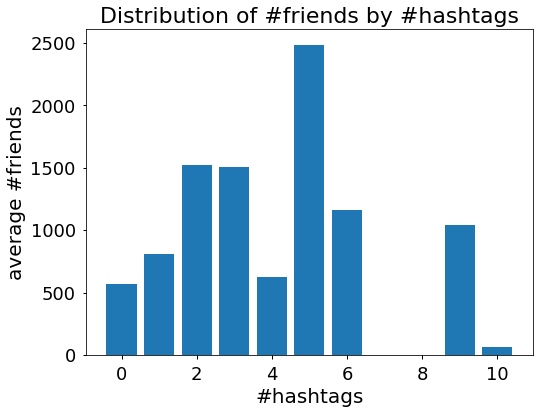

In [41]:
## Just write code here, write justification in next cell
# YOUR CODE HERE
hashFriends = df_tweets.groupby('#hashtags', as_index = False)['#friends'].mean()
plt.figure(figsize=(8,6))
plt.bar(hashFriends["#hashtags"], hashFriends["#friends"])
plt.xlabel('#hashtags', fontsize=20)
plt.ylabel('average #friends', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Distribution of #friends by #hashtags',fontsize=22)

# distribution of #friends segregated by the number of hashtags
#plt.figure(figsize=(8,6))
#data = df_tweets[['#friends','#hashtags']]

#sns.countplot(x='#hashtags', hue='#friends', data=data, palette='colorblind')
#plt.xlabel('#hashtags', fontsize=20)
#plt.ylabel('Total #friends', fontsize=20)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.title('Distribution of #friends by #hashtags',fontsize=22)

#### Justify your choice of plot. 
We have chosen a bar graph, this is because the bar graph provides the simplest visualization at a glance with as little clutter as possible. Any relations are immediately apparant between #hashtags and #friends by using the average #friends. It allows someone to quickly determine whether or not there is a correlation or pattern between the two.

# Q7 [15 marks] (hard)

1. Visualize the distribution of median of #friends of a user, using only the top 2 most frequent languages in the dataset. Your visualization should also convey how this distribution is dependent upon the number of hashtags in the tweet. **[7 marks]**

2. Justify your choice of plot. **[3 marks]**

3. What conclusions can you draw about distribution of median of #friends for both languages? Are there any common trends between two languages and what are the major differences in distribution of median of #friends of user. **[5 marks]**

Text(0.5,1,'Median of Friends with Respect to User Language and Hashtags')

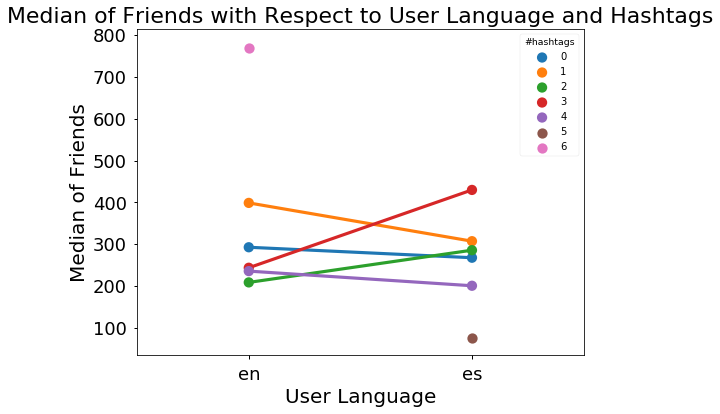

In [42]:
## Just write code here, write justification in next cell
# YOUR CODE HERE

most_frequent_languages = df_tweets['lang_user'].value_counts().reset_index().head(2)

q7_df = df_tweets[(df_tweets['lang_user'] == most_frequent_languages.iloc[0]['index']) |
                 (df_tweets['lang_user'] == most_frequent_languages.iloc[1]['index'])]
q7_df = q7_df[['#hashtags', 'lang_user', '#friends']].groupby(['#hashtags', 'lang_user']).median().reset_index()

plt.figure(figsize=(8,6))
ax = sns.pointplot(x = 'lang_user', y = '#friends',hue = '#hashtags' ,data=q7_df)
plt.xlabel('User Language', fontsize=20)
plt.ylabel('Median of Friends', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Median of Friends with Respect to User Language and Hashtags',fontsize=22)

Your justification here(Q7.2)

#### Justify your choice of plot. 
sns.pointplot works well to present the relationship among three different things (e.g. in Q7 we want to know the relevance among: the median of #friends, language, the number of hashtags). For sns.countplot, in this question, we do not need it to use sns.countplot to count rows.

Observations and Conclusions(Q7.3)

#### What conclusions can you draw about distribution of median of #friends for both languages? Are there any common trends between two languages and what are the major differences in distribution of median of #friends of user.
It seems that there is not obvious relevance (or trends) on median of friends between two languages since the lines in the graph are intersecting. However, the disribution under 5 hashtags is steady, between 200 to 500. For language "es", especially, the disribution is similar to normal disribution where there is a peak at the middle of hashtags number.

### Q8 and Q9 will require to look into methods not part of lecture or labs. We have provided links to some examples that might be useful in solving those questions.

## Q8 [15 marks] (slightly hard)


Complete the following function `get_most_retweeted_tweets(data, n)`. Return details of 'n' most retweeted tweets in the dataset (you might find this [example](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html) useful). You also need to return the number of times a particular tweet is retweeted as part of the dataframe. You do not need to sort the dataframe in any particular order.

**Note** This question might require you to play a bit more with your dataframe, specially things like reset_index of a [dataframe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html) and would require working on more than one dataframe.

In [43]:
def get_most_retweeted_tweets(data, n):
    # YOUR CODE HERE
    
    # count the number of retweeted and save it into dataframe
    rtw_count = data['rtwid'].value_counts().reset_index(name = 'counts')
    rtw_count.rename(columns = {'index': 'twid'}, inplace = True)
    
    # find n most retweeted tweets
    n_most_rtw = []
    for index in range(n):
        n_most_rtw.append(rtw_count.iloc[index]['twid'])
    
    # details of 'n' most retweeted tweets
    df = data[data['twid'].isin(n_most_rtw)]
    df = pd.merge(df, rtw_count[0:n], on = 'twid')
    
    return (df)

In [44]:
assert(get_most_retweeted_tweets(df_tweets,10).shape==(10,12))
assert(get_most_retweeted_tweets(df_tweets,10).counts.max()==815)

## Q9 [15 marks] (hard)

Complete the following function `get_tweets_hrs(data,tweet_id,hours)`.  The
function returns a dataframe containing all of the retweets for a tweet
(including the tweet) with a given tweet id (`twid=tweet_id`) and within a given
number of hours (`hours`) after it was first tweeted.

You might find this [example](https://pandas.pydata.org/pandas-docs/stable/timedeltas.html) useful.

In [45]:
def get_tweets_hrs(data,tweet_id,hours):
    # YOUR CODE HERE
    
    all_tweets = data[data['rtwid'] == tweet_id]
    
    # find the time limitation
    tweet_time = all_tweets[all_tweets['twid'] == tweet_id]['time_created']
    tweet_time = tweet_time.iloc[0] # get the value
    hours = pd.Timedelta(hours = hours)
    tweet_time_limite = tweet_time + hours
    
    # find all of the retweets within a given number of hours after it was first tweeted
    df = all_tweets[all_tweets['time_created'] < tweet_time_limite]
    
    return (df)

In [46]:
assert(get_tweets_hrs(df_tweets,'498439420463153152',3).shape==(102,11))
assert(get_tweets_hrs(df_tweets,'498291667007328256',3).shape==(46,11))
df = get_tweets_hrs(df_tweets,'498439420463153152',3)
assert(df['time_created'].iloc[-1] - df['time_created'].iloc[0]==pd.Timedelta('0 days 02:46:06'))